# Example of Hindmarsh-Rose model

Reference: 

- Hindmarsh, James L., and R. M. Rose. "*A model of neuronal bursting using three coupled first order differential equations.*" Proceedings of the Royal society of London. Series B. Biological sciences 221.1222 (1984): 87-102.
- Storace, Marco, Daniele Linaro, and Enno de Lange. "*The Hindmarsh–Rose neuron model: bifurcation analysis and piecewise-linear approximations.*" Chaos: An Interdisciplinary Journal of Nonlinear Science 18.3 (2008): 033128.

Hindmarsh-Rose model is a neuron model. It is composed of 3 differential equations and can generate several firing patterns by tuning patterns.

In [1]:
import brainpy as bp
import brainmodels
import matplotlib.pyplot as plt

In [2]:
bp.math.set_dt(dt=0.01)
bp.set_default_odeint('rk4')

In [3]:
types = ['quiescence', 'spiking', 'bursting', 'irregular_spiking', 'irregular_bursting']
bs = bp.math.array([1.0, 3.5, 2.5, 2.95, 2.8])
Is = bp.math.array([2.0, 5.0, 3.0, 3.3, 3.7])

In [4]:
# define neuron type
group = brainmodels.neurons.HindmarshRose(len(types), b=bs, monitors=['V'])
group = bp.math.jit(group)
group.run(1e3, inputs=['input', Is], report=0.1)

Compilation used 1.8966 s.
Start running ...
Run 10.0% used 0.084 s.
Run 20.0% used 0.166 s.
Run 30.0% used 0.253 s.
Run 40.0% used 0.334 s.
Run 50.0% used 0.427 s.
Run 60.0% used 0.510 s.
Run 70.0% used 0.592 s.
Run 80.0% used 0.677 s.
Run 90.0% used 0.776 s.
Run 100.0% used 0.858 s.
Simulation is done in 0.858 s.



0.8582992553710938

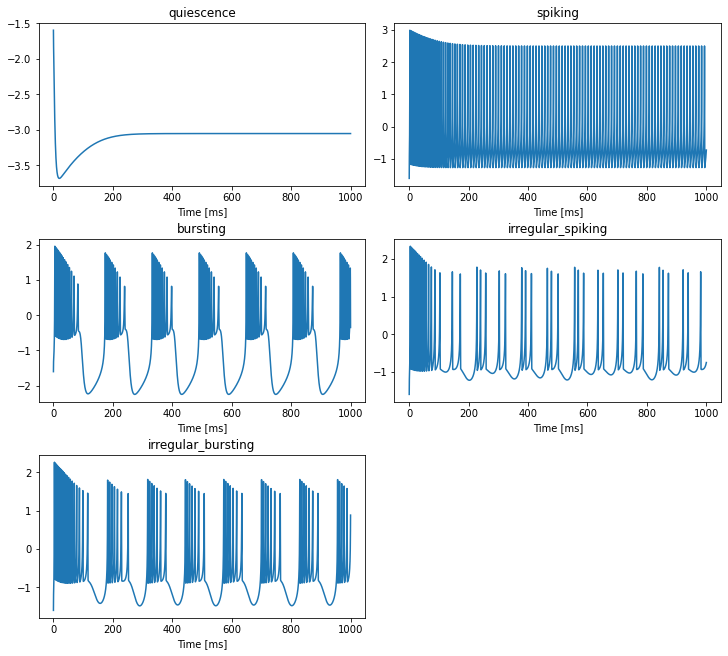

In [5]:
fig, gs = bp.visualize.get_figure(row_num=3, col_num=2, row_len=3, col_len=5)
for i, mode in enumerate(types):
    # plot
    fig.add_subplot(gs[i // 2, i % 2])
    plt.plot(group.mon.ts, group.mon.V[:, i])
    plt.title(mode)
    plt.xlabel('Time [ms]')
plt.show()